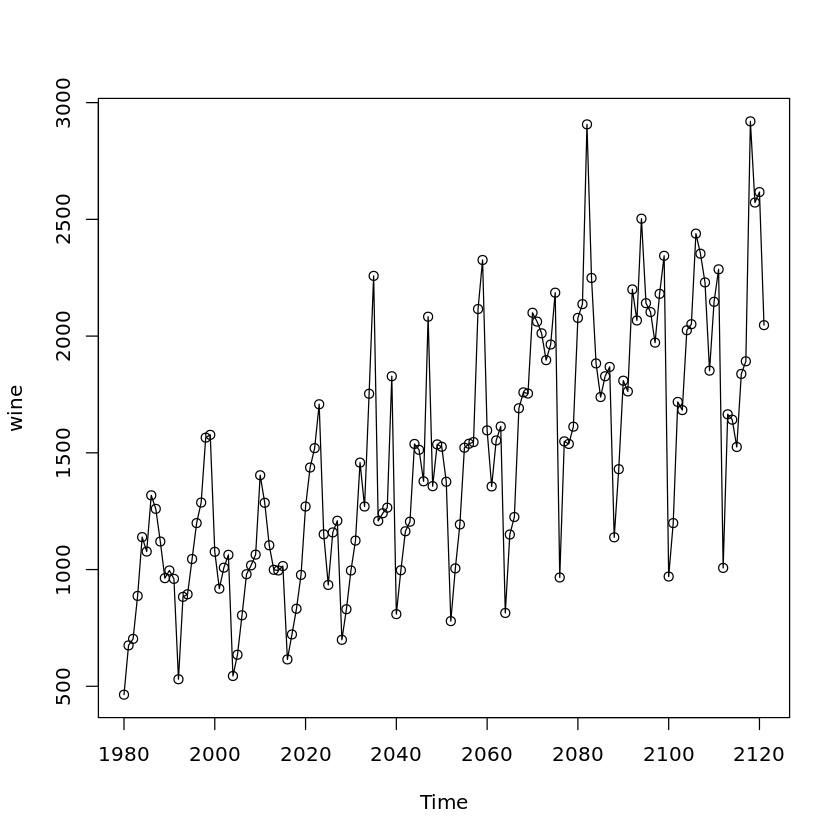

In [1]:
#########################################################################
###  577 In-class Assignment 3                                        ###
###  Fitting ARIMA(p,d,q) to Wine Data                                ###
###  Eric Maibach                                                     ###
#########################################################################

# Load the data
D <- read.csv("https://nmimoto.github.io/datasets/wine.csv")
D1 <- ts(D, start=c(1980,1), freq=1)
plot(D1, type='o')

In [2]:
D

wine
<dbl>
464
675
703
887
1139
1077
1318
1260
1120


In [2]:
#####################################################################

#1) Does "D1" look like stationary time series:  State your
#   graphical observations and conclusions drawn from p-vlaues
#   from Stationarity.tests().

# Perform stationary tests
library(forecast)
source('https://nmimoto.github.io/R/TS-00.txt')

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [3]:
Stationarity.tests(D1)

Warning message in adf.test(A):
“p-value smaller than printed p-value”
Warning message in pp.test(A):
“p-value smaller than printed p-value”
Warning message in kpss.test(A):
“p-value smaller than printed p-value”


,KPSS,ADF,PP
p-val:,0.01,0.01,0.01


In [ ]:
# Doing a visual inspection of the graph, it does not appear
# to be stationary

# KPSS indicates not stationary
# ADF indicates stationary
# PP indicates stationary

# The tests do not agree, so not conclusive.


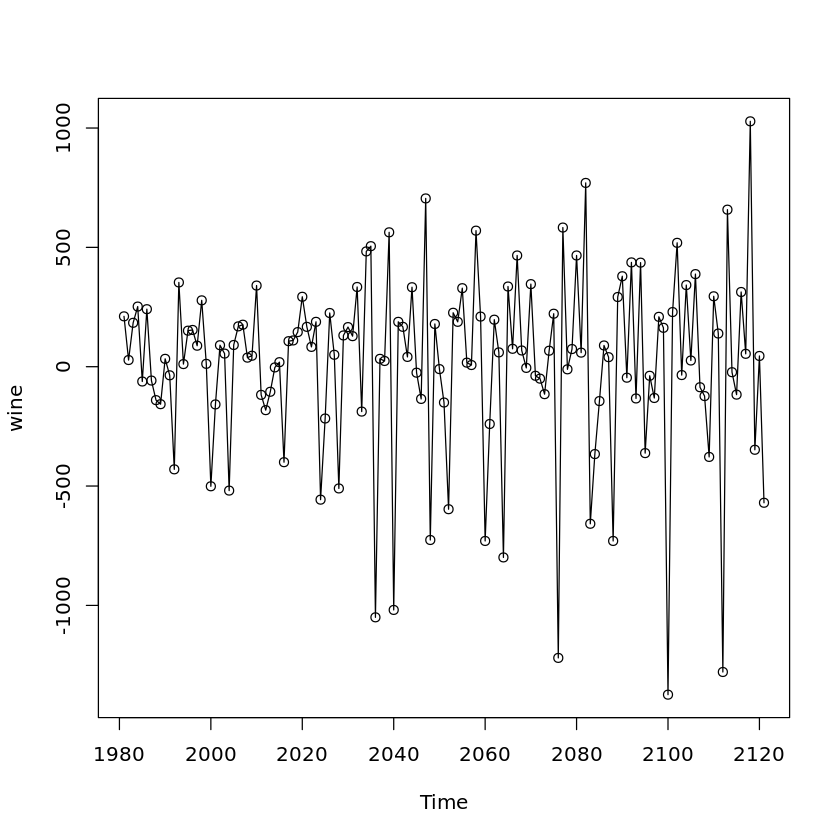

In [4]:
#################################################################
# 2) Take difference of D1 using diff(), plot it and check
#    the stationarity.  State your graphical observations and 
#    conclusions drawn from p-value from Stationarity.tests()

D2 <- diff(D1)
plot(D2, type='o')

In [5]:
Stationarity.tests(D2)

Warning message in adf.test(A):
“p-value smaller than printed p-value”
Warning message in pp.test(A):
“p-value smaller than printed p-value”
Warning message in kpss.test(A):
“p-value greater than printed p-value”


,KPSS,ADF,PP
p-val:,0.1,0.01,0.01


In [6]:
# Doing a visual inspection of the graph, it appears roughly
# stationary, althought the variance does seem to increase.

# KPSS indicates stationary
# ADF indicates stationary
# PP indicates stationary

#############################################################
# 3) Should we take any transformation before differing?

# The variance is increasing.  I believe this is because this
# is financial data, and the same relative change is a 
# bigger difference as the numbers get bigger.  Taking a log
# corrects this, so I will look at BoxCox with lambda 0.


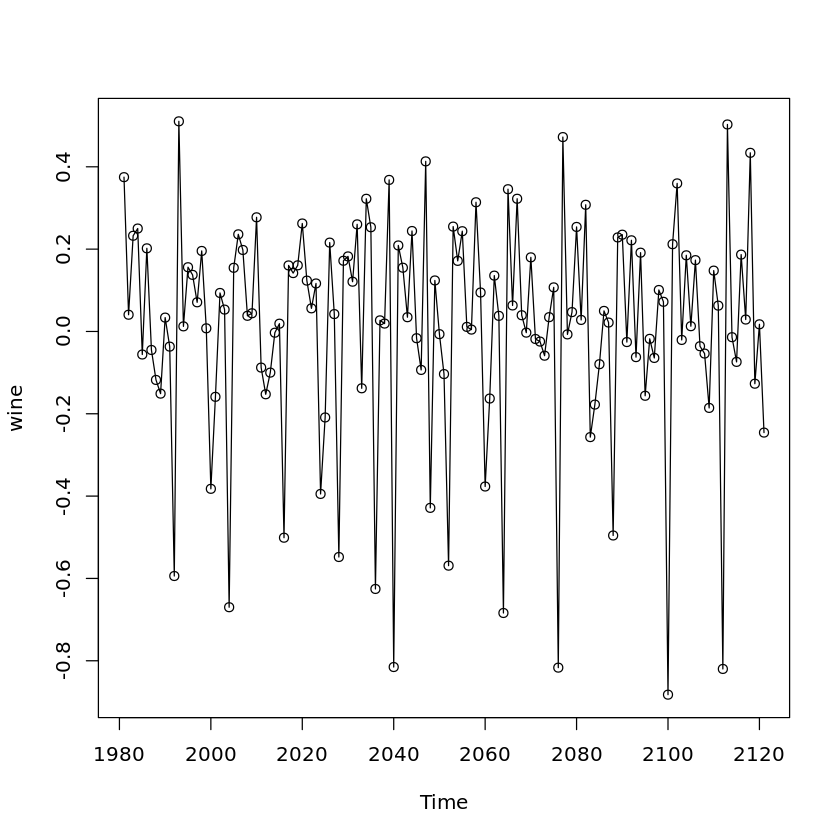

In [55]:
# Take BoxCox with lambda 0
D3 <- BoxCox(D1, 0)

#Plot the result
plot(diff(D3), type='o')

In [48]:
mean(D3)

## This does seems to get rid of the increasing variance.

[1] 7.229675

In [11]:
###################################################################
# 4) Use auto.arima() function to find best ARIMA(p,d,q) model 
#    with constraint that d=1.

Fit1 <- auto.arima(D1, d=1, lambda=0, stepwise=FALSE, approximation=FALSE)

Fit1

Series: D1 
ARIMA(3,1,2) 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1      ar2      ar3      ma1     ma2
      1.2830  -0.3135  -0.2752  -1.8894  0.9566
s.e.  0.1063   0.1474   0.0929   0.1135  0.1178

sigma^2 estimated as 0.04984:  log likelihood=11.51
AIC=-11.02   AICc=-10.39   BIC=6.68

In [28]:
#Series: D1 
#ARIMA(3,1,2) 
#Box Cox transformation: lambda= 0 

#Coefficients:
#         ar1      ar2      ar3      ma1     ma2
#      1.2830  -0.3135  -0.2752  -1.8894  0.9566
#s.e.  0.1063   0.1474   0.0929   0.1135  0.1178

#sigma^2 estimated as 0.04984:  log likelihood=11.51
#AIC=-11.02   AICc=-10.39   BIC=6.68

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0,0,0,0,0,0,0.216


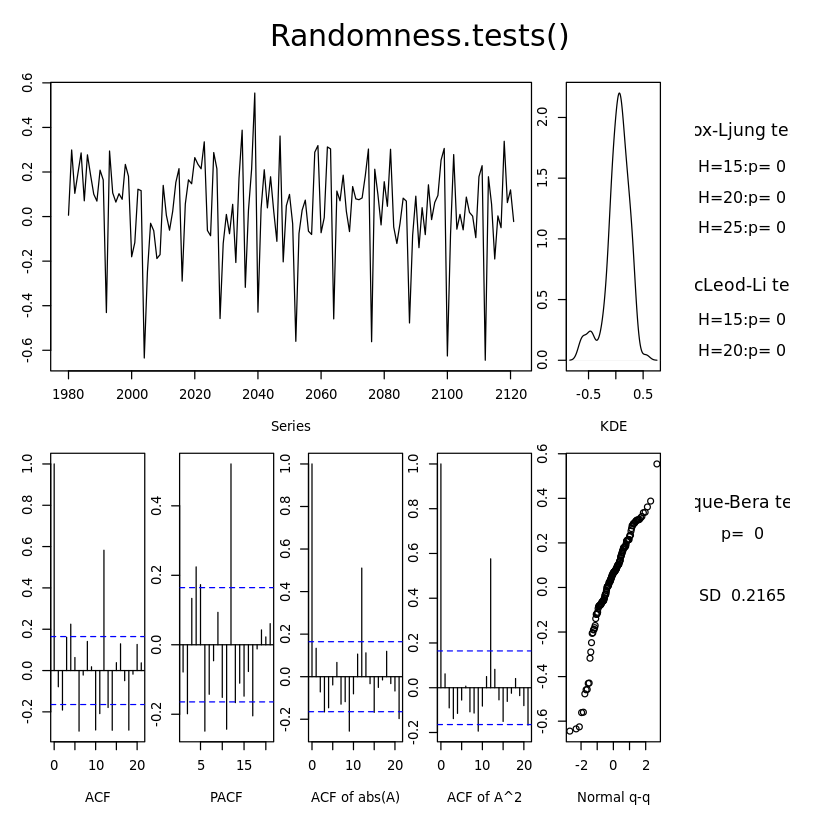

In [12]:
Randomness.tests(Fit1$residuals)

In [32]:
#  B-L test H0: the sereis is uncorrelated
#  M-L test H0: the square of the sereis is uncorrelated
#  J-B test H0: the sereis came from Normal distribution
#  SD         : Standard Deviation of the series

# The suggested model is ARIMA(3,1,2)
# It does pass the residual test for model adequacy

In [13]:
########################################################

# 5) Now search for better ARIMA model without the 
#    guidance of AICc.  Start with ARIMA(15,1,15)
#    with the drift model.

Fit2 <- Arima(D1, lambda = 0, order=c(15,1,15), include.drift=TRUE)
Fit2

Warning message in sqrt(diag(x$var.coef)):
“NaNs produced”


Series: D1 
ARIMA(15,1,15) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1     ar2     ar3      ar4      ar5      ar6      ar7      ar8
      -0.6191  0.0284  -0.052  -0.0367  -0.0612  -0.0709  -0.0457  -0.0723
s.e.   0.0111     NaN   0.010   0.0095   0.0133   0.0092   0.0158   0.0124
          ar9     ar10     ar11    ar12    ar13     ar14   ar15      ma1
      -0.0659  -0.0678  -0.0476  0.9279  0.5601  -0.0886  6e-04  -0.1681
s.e.   0.0067   0.0107   0.0129  0.0080     NaN      NaN  3e-03      NaN
          ma2     ma3      ma4     ma5      ma6      ma7     ma8     ma9
      -0.5181  0.0028  -0.1137  0.1502  -0.0734  -0.0992  0.1546  -0.027
s.e.      NaN  0.0077   0.0104  0.0067      NaN   0.0052     NaN     NaN
        ma10     ma11     ma12    ma13    ma14    ma15   drift
      0.1176  -0.1454  -0.7901  0.0210  0.4058  0.0856  0.0061
s.e.  0.0066   0.0061      NaN  0.0071     NaN  0.0074  0.0008

sigma^2 estimated as 0.01314:  log likelihood=107.49
AIC=-

In [14]:
# ar15, and ar14 ar not significant, remove them
Fit2 <- Arima(D1, lambda=0, order=c(13,1,15), include.drift=TRUE)
Fit2

Series: D1 
ARIMA(13,1,15) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.8411  -0.1294  -0.1281  -0.1005  -0.1270  -0.1341  -0.1153  -0.1449
s.e.   0.3468   0.1157   0.1165   0.1163   0.1157   0.1166   0.1143   0.1145
          ar9     ar10     ar11    ar12    ar13     ma1      ma2      ma3
      -0.1392  -0.1421  -0.1168  0.8644  0.7104  0.0374  -0.5347  -0.0416
s.e.   0.1194   0.1150   0.1221  0.1146  0.3021  0.3713   0.3040   0.1198
          ma4     ma5      ma6      ma7     ma8      ma9    ma10     ma11
      -0.1201  0.1545  -0.0615  -0.0855  0.1664  -0.0576  0.1109  -0.1577
s.e.   0.1545  0.1399   0.1631   0.1208  0.1400   0.1102  0.1265   0.1480
         ma12     ma13    ma14    ma15   drift
      -0.8449  -0.0946  0.3960  0.1332  0.0062
s.e.   0.1796   0.1882  0.2031  0.1140  0.0006

sigma^2 estimated as 0.01243:  log likelihood=108.15
AIC=-156.3   AICc=-139.39   BIC=-67.84

In [15]:
# ma15 is not significant, remove it
Fit2 <- Arima(D1, lambda=0, order=c(13,1,14), include.drift=TRUE)
Fit2

Series: D1 
ARIMA(13,1,14) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.2523  -0.1129  -0.0779  -0.0884  -0.0937  -0.1068  -0.0755  -0.1245
s.e.   0.7640   0.0967   0.1162   0.0981   0.1016   0.1072   0.1075   0.0963
          ar9     ar10     ar11    ar12    ar13      ma1      ma2      ma3
      -0.0911  -0.1133  -0.0763  0.8817  0.1697  -0.5417  -0.0905  -0.0896
s.e.   0.1240   0.1012   0.1163  0.0956  0.6706   0.7458   0.5708   0.0857
          ma4     ma5      ma6     ma7     ma8      ma9    ma10     ma11
      -0.0088  0.1308  -0.1678  0.0095  0.1432  -0.0967  0.1623  -0.2223
s.e.   0.1151  0.0983   0.1431  0.2165  0.1342   0.1197  0.1811   0.2529
         ma12    ma13    ma14   drift
      -0.6842  0.2662  0.1904  0.0063
s.e.   0.2590  0.4772  0.3528  0.0006

sigma^2 estimated as 0.01239:  log likelihood=107.71
AIC=-157.41   AICc=-141.74   BIC=-71.9

In [16]:
# ma14 and ma13 are not significant, remove them
Fit2 <- Arima(D1, lambda=0, order=c(13,1,12), include.drift=TRUE)
Fit2

Series: D1 
ARIMA(13,1,12) with drift 
Box Cox transformation: lambda= 0 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.5171  -0.2386  -0.2195  -0.2023  -0.2272  -0.2222  -0.2113  -0.2481
s.e.   0.1049   0.0807   0.0790   0.0802   0.0787   0.0783   0.0780   0.0774
          ar9     ar10     ar11    ar12    ar13      ma1      ma2      ma3
      -0.2320  -0.2479  -0.2187  0.7444  0.2889  -0.2427  -0.1417  -0.1004
s.e.   0.0794   0.0788   0.0813  0.0763  0.1123   0.0513   0.1398   0.0920
          ma4     ma5      ma6     ma7     ma8     ma9    ma10     ma11
      -0.1327  0.1315  -0.1709  0.0340  0.2398  0.0348  0.2178  -0.1669
s.e.   0.1062  0.1027   0.1059  0.0742  0.1124  0.0966  0.1120   0.1167
         ma12   drift
      -0.7021  0.0063
s.e.   0.0987  0.0005

sigma^2 estimated as 0.01285:  log likelihood=104.42
AIC=-154.84   AICc=-141.46   BIC=-75.23

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.931,0.992,0.992,0.522,0.524,0.483,0.102


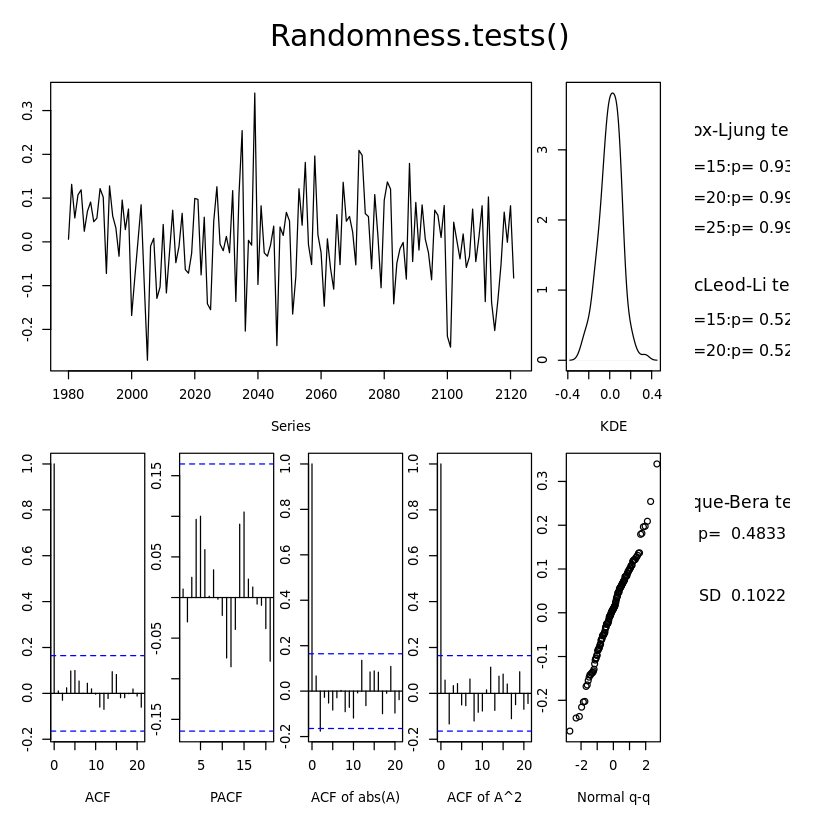

In [17]:
Randomness.tests(Fit2$residuals)

In [18]:
#Series: D1 
#ARIMA(13,1,12) with drift 
#Box Cox transformation: lambda= 0 

#Coefficients:
#          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
#      -0.5171  -0.2386  -0.2195  -0.2023  -0.2272  -0.2222  -0.2113  -0.2481
#s.e.   0.1049   0.0807   0.0790   0.0802   0.0787   0.0783   0.0780   0.0774
#          ar9     ar10     ar11    ar12    ar13      ma1      ma2      ma3
#      -0.2320  -0.2479  -0.2187  0.7444  0.2889  -0.2427  -0.1417  -0.1004
#s.e.   0.0794   0.0788   0.0813  0.0763  0.1123   0.0513   0.1398   0.0920
#          ma4     ma5      ma6     ma7     ma8     ma9    ma10     ma11
#      -0.1327  0.1315  -0.1709  0.0340  0.2398  0.0348  0.2178  -0.1669
#s.e.   0.1062  0.1027   0.1059  0.0742  0.1124  0.0966  0.1120   0.1167
#         ma12   drift
#      -0.7021  0.0063
#s.e.   0.0987  0.0005

#sigma^2 estimated as 0.01285:  log likelihood=104.42
#AIC=-154.84   AICc=-141.46   BIC=-75.23
#
#
#  B-L test H0: the sereis is uncorrelated
#  M-L test H0: the square of the sereis is uncorrelated
#  J-B test H0: the sereis came from Normal distribution
#  SD         : Standard Deviation of the series



#Final model is ARIMA(13,1,12) with drift
# This models AICc is -141.46 which is lower than 
# the auto.arima models AICc of -10.39.
#
# The ARIMA(15,1,13) with drift model does pass the 
# residual adequacy test.

# auto.arima did not pick this model because it defaults
# to p and q max values of 5.

#############################################################
# 6) Another model we can fit this data is d=0 with linear
#   trend model.  What is your linear trend model?  Does 
#   this final model pass the residual adequacy test?

In [19]:
Fit3 <- auto.arima(D1, d=0, lambda=0, xreg=time(D1), stepwise=FALSE, approximation=FALSE)

Fit3

Series: D1 
Regression with ARIMA(4,0,1) errors 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1      ar2     ar3      ar4      ma1  intercept    xreg
      1.0148  -0.2605  0.1093  -0.3121  -0.6627    -6.1249  0.0065
s.e.  0.0999   0.1211  0.1176   0.0837   0.0734     0.7148  0.0004

sigma^2 estimated as 0.04715:  log likelihood=18.35
AIC=-20.69   AICc=-19.61   BIC=2.95

In [ ]:
#Series: D1 
#Regression with ARIMA(4,0,1) errors 
#Box Cox transformation: lambda= 0 

#Coefficients:
#         ar1      ar2     ar3      ar4      ma1  intercept    xreg
#      1.0148  -0.2605  0.1093  -0.3121  -0.6627    -6.1249  0.0065
#s.e.  0.0999   0.1211  0.1176   0.0837   0.0734     0.7148  0.0004

#sigma^2 estimated as 0.04715:  log likelihood=18.35
#AIC=-20.69   AICc=-19.61   BIC=2.95

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0,0,0,0,0,0,0.212


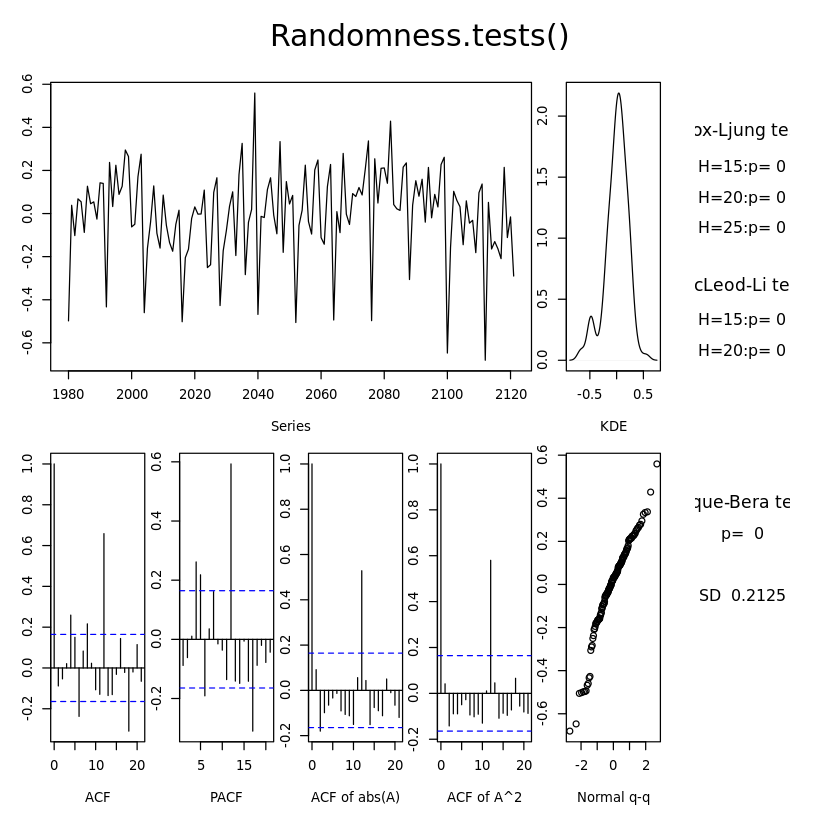

In [21]:
Randomness.tests(Fit3$residuals)


Call:
lm(formula = D2 ~ time(D2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72153 -0.11939  0.03217  0.17556  0.59503 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.3264336  1.1271356  -5.613 1.03e-07 ***
time(D2)     0.0066111  0.0005496  12.029  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2684 on 140 degrees of freedom
Multiple R-squared:  0.5083,	Adjusted R-squared:  0.5048 
F-statistic: 144.7 on 1 and 140 DF,  p-value: < 2.2e-16


Warning message in adf.test(A):
“p-value smaller than printed p-value”
Warning message in pp.test(A):
“p-value smaller than printed p-value”
Warning message in kpss.test(A):
“p-value greater than printed p-value”


,KPSS,ADF,PP
p-val:,0.1,0.01,0.01


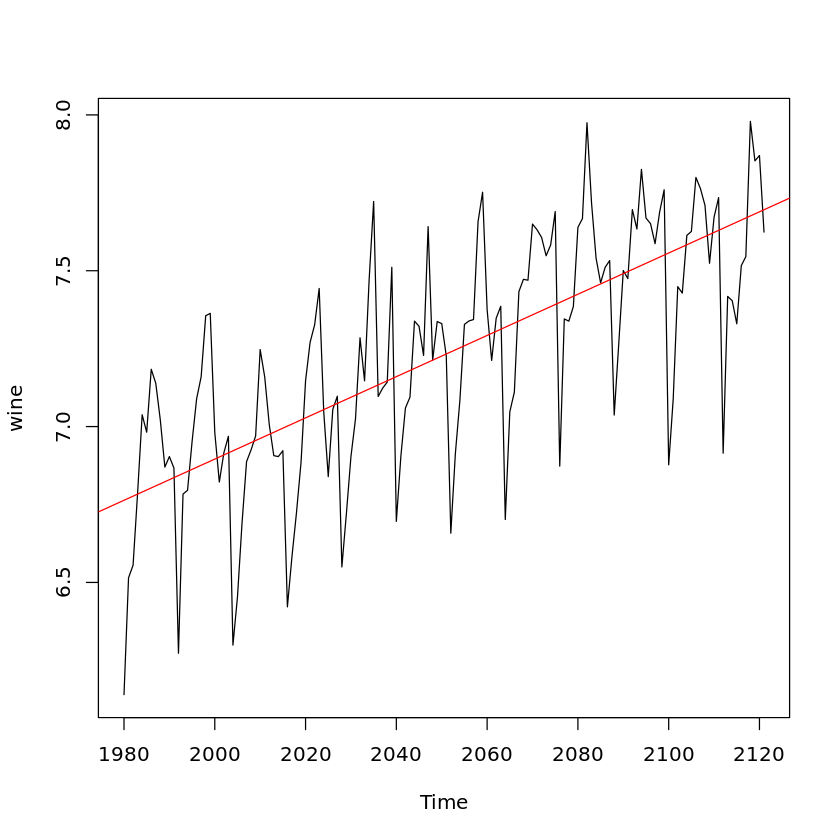

In [22]:
#  B-L test H0: the sereis is uncorrelated
#  M-L test H0: the square of the sereis is uncorrelated
#  J-B test H0: the sereis came from Normal distribution
#  SD         : Standard Deviation of the series

# The suggested model is ARIMA(4,0,1)
# It does pass the residual test for model adequacy

###############################################################
# 7) Is the slope estimate you get in (6) consistent with the
#    drift term you had in (5)?

# The drift term in (5) was 0.0063.  The slope estimage in (6)
# was 0.0065.  So yes, they are consistent.

###############################################################
# 8) Use the following code to fit the regression line outside
#    of auto.arima(), and test the regression residuals
#    for statuionarity.  Is the estimate consistent with (6)?

D2 <- BoxCox(D1, 0)
Reg <- lm(D2~time(D2))
summary(Reg)
plot(D2)
abline(Reg, col="red")
Stationarity.tests(Reg$residuals)

In [23]:
# Coefficients:
#              Estimate Std. Error t value Pr(>|t|)    
# (Intercept) -6.3264336  1.1271356  -5.613 1.03e-07 ***
# time(D2)     0.0066111  0.0005496  12.029  < 2e-16 ***

# The estimate slope is 0.0066, with is consistent with the 
# slope estimate of 0.0065 from (6).

In [24]:
###############################################################
# 9) Now we need to compare the models you got from (5) vs (6).
#    Perform 12-step forecast using the model from (5).  What
#    is the 95% CI for the next observation?

In [25]:
Fit2 <- Arima(D1, lambda=0, order=c(13,1,12), include.drift=TRUE)
forecast1 <- forecast(Fit2, 12)
forecast1

     Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
2122       2279.241 1966.0624 2642.308 1818.0907 2857.361
2123       2314.321 1986.2281 2696.610 1831.8166 2923.919
2124       1070.589  914.2493 1253.663  840.9539 1362.930
2125       1585.847 1353.0569 1858.688 1243.9951 2021.640
2126       1800.309 1536.0301 2110.059 1412.2161 2295.055
2127       1872.666 1595.2017 2198.392 1465.3720 2393.167
2128       2334.660 1987.9639 2741.818 1825.7892 2985.358
2129       2365.026 2013.5747 2777.819 1849.1911 3024.753
2130       3379.871 2870.4847 3979.651 2632.6875 4339.112
2131       2907.324 2465.9807 3427.656 2260.1530 3739.806
2132       2874.616 2422.3952 3411.259 2212.5572 3734.781
2133       2414.688 2034.0357 2866.576 1857.4595 3139.082

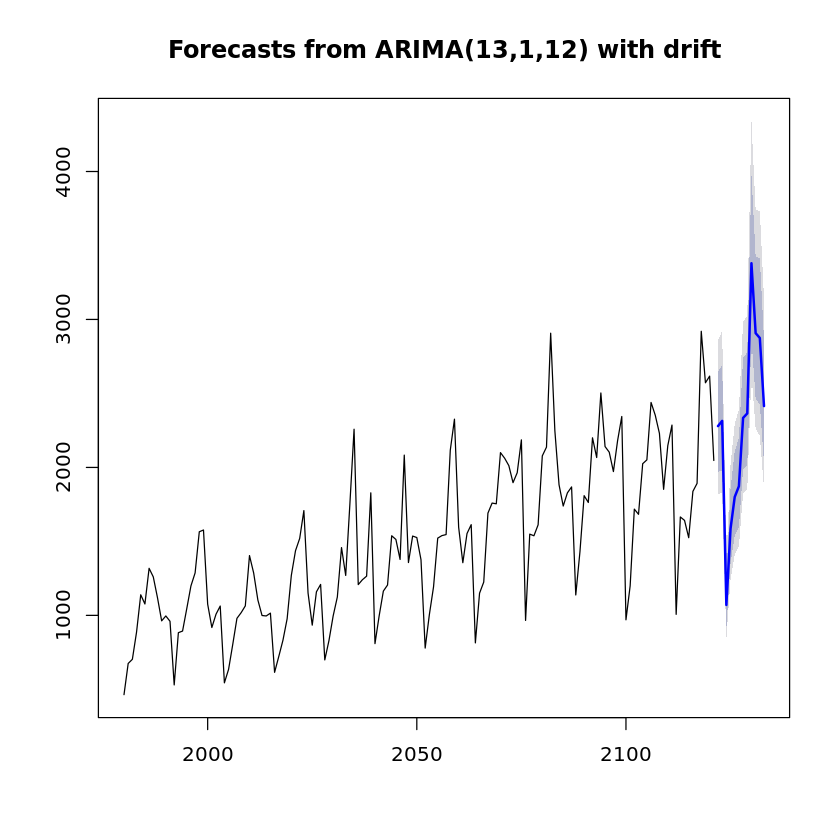

In [26]:
plot(forecast1)

In [54]:
# The 95% CI for the next observation is 1818.09 to 2857.36

################################################################
# 10) Perform 12-step forecast using the model from (6).  What
#     is the 95% CI for the next observation?

In [28]:
Fit2 <- Arima(D1, lambda=0, order=c(4,0,1), include.drift=FALSE, xreg=time(D1))
forecast1 <- forecast(Fit2, 12, xreg=last(time(D1))+(1:12)/frequency(D1))
forecast1

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2122       2198.627 1664.532 2904.096 1436.524 3365.039
2123       2174.177 1618.678 2920.311 1384.619 3413.967
2124       2048.969 1523.588 2755.519 1302.431 3223.414
2125       2111.615 1567.426 2844.741 1338.665 3330.870
2126       2165.965 1600.971 2930.349 1364.252 3438.812
2127       2205.020 1609.863 3020.202 1362.902 3567.469
2128       2286.392 1652.536 3163.374 1391.586 3756.569
2129       2352.306 1685.963 3282.007 1413.440 3914.806
2130       2391.071 1707.788 3347.735 1429.099 4000.577
2131       2416.283 1725.473 3383.666 1443.756 4043.915
2132       2418.955 1726.539 3389.059 1444.274 4051.407
2133       2405.030 1712.701 3377.221 1430.975 4042.117

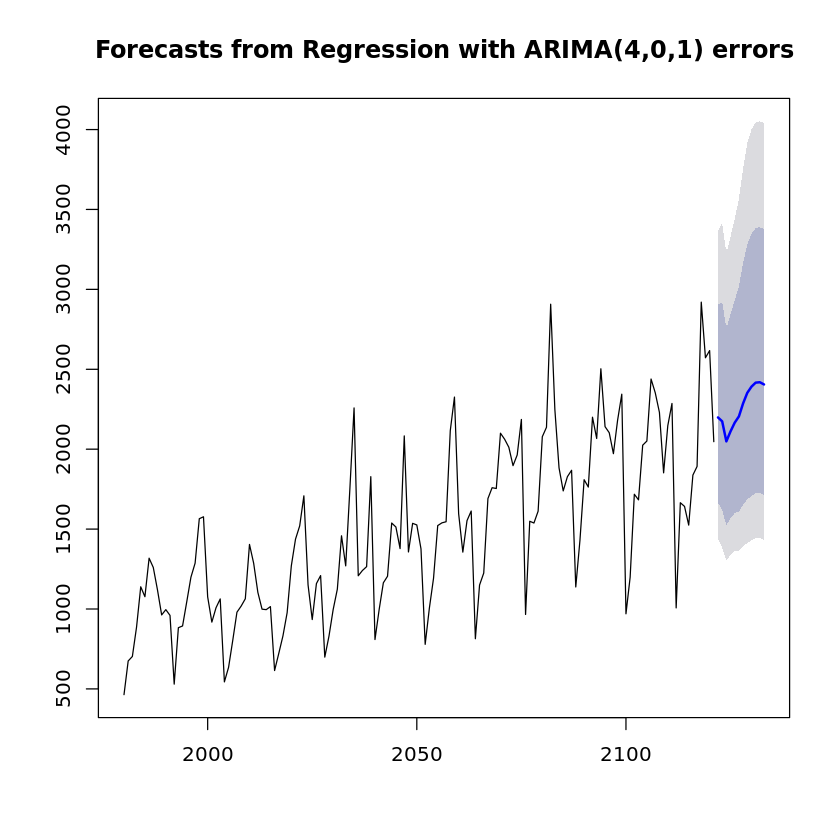

In [29]:
plot(forecast1)

In [ ]:
# 95% CI for the next observation is 1,436.52 to 3,365.04

    i= 12   MLE-CSS failed.  Using CSS.


Warning message in predict.Arima(object, n.ahead = h, newxreg = xreg):
“MA part of model is not invertible”


    i= 15   MLE-CSS failed.  Using CSS.


Warning message in predict.Arima(object, n.ahead = h, newxreg = xreg):
“MA part of model is not invertible”


    i= 18   MLE-CSS failed.  Using CSS.


Warning message in predict.Arima(object, n.ahead = h, newxreg = xreg):
“MA part of model is not invertible”


    i= 21   MLE-CSS failed.  Using CSS.


Warning message in predict.Arima(object, n.ahead = h, newxreg = xreg):
“MA part of model is not invertible”


    i= 27   MLE-CSS failed.  Using CSS.


Warning message in predict.Arima(object, n.ahead = h, newxreg = xreg):
“MA part of model is not invertible”


    i= 39   MLE-CSS failed.  Using CSS.


Warning message in predict.Arima(object, n.ahead = h, newxreg = xreg):
“MA part of model is not invertible”



Last  42  obs fit retrospectively
    with Rolling 1-step prediction
  Average prediction error:  -89.3665
  root Mean Squared Error:   255.6633 




mean pred error,rMSE
-89.3665,255.6633


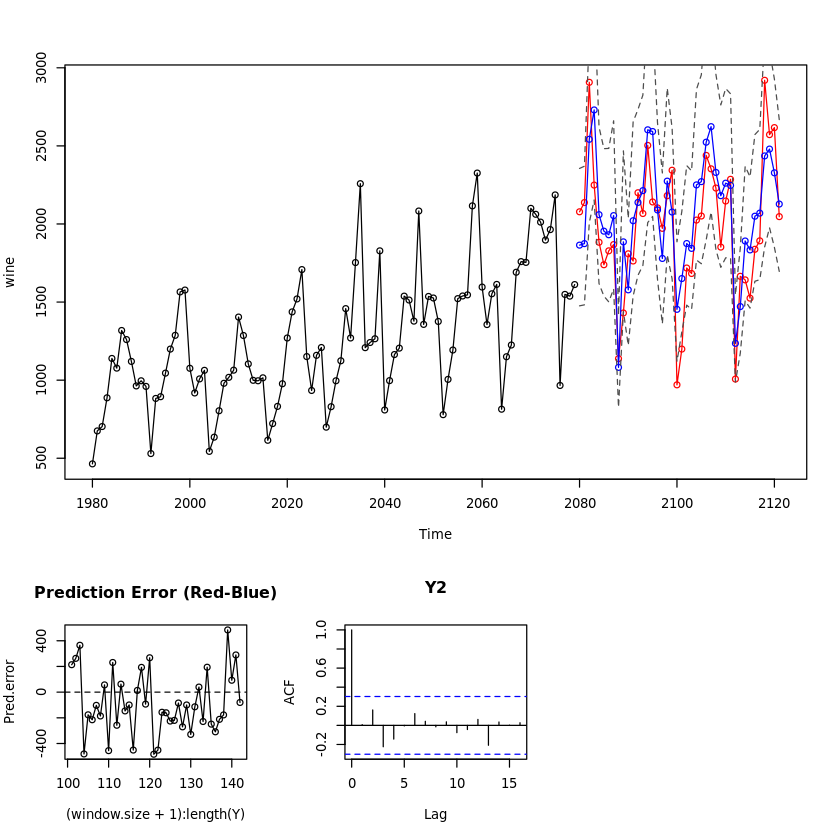

In [30]:
################################################################
# 11) Perform rolling 1-step prediction of last 42 observations
#     restrospectively using model from (5).  Report prediction
#     rMSE.  Compare that with sigma-hat from the model.
Y <- D1
window.size <- 100
Arima.order <- c(13,1,12)
pred.plot <- TRUE
include.mean = TRUE
include.drift = TRUE
lambda = 0
xreg = FALSE
seasonal = c(0, 0, 0)

Rolling1step.forecast(Y, window.size, Arima.order, pred.plot, include.mean, include.drift, lambda, xreg, seasonal)

In [31]:
InvBoxCox(sqrt(0.01285), 0)

[1] 1.120033

In [49]:
mu <- 7.22967
sig <- sqrt(0.01285)
Y = rnorm(100000, mu, sig)
sd(Y)

[1] 0.1133847

In [50]:
X = InvBoxCox(Y, lambda = 0)
sd(X)

[1] 158.0524


Last  42  obs fit retrospectively
    with Rolling 1-step prediction
  Average prediction error:  -196.2325
  root Mean Squared Error:   468.6052 




mean pred error,rMSE
-196.2325,468.6052


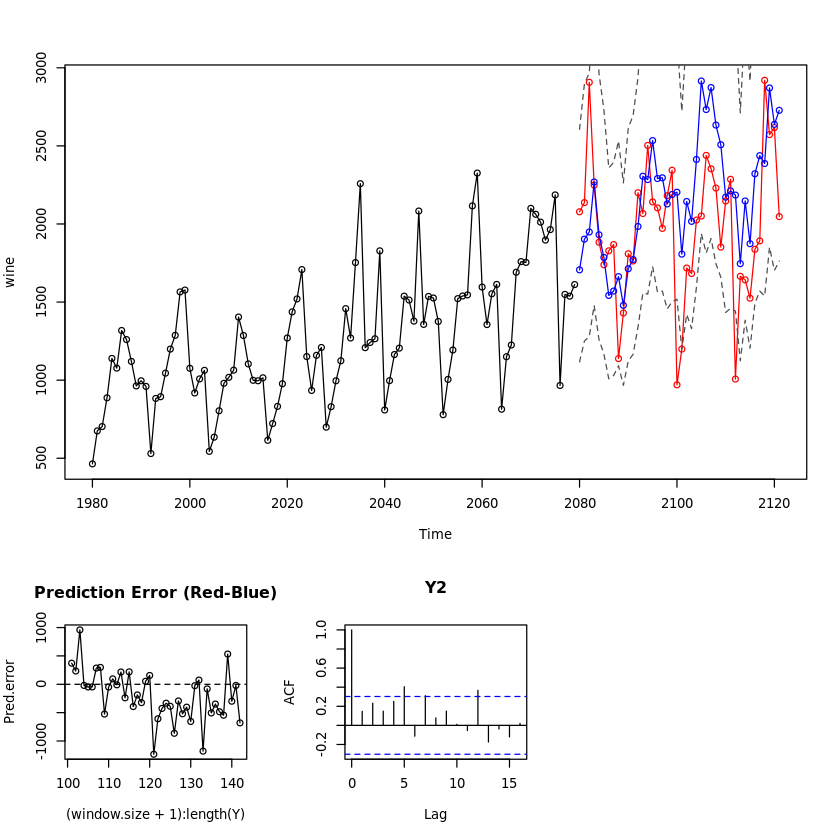

In [32]:
# rMSE is 255.6633.  The untransformed sigma-hat from the model was 158.05244

################################################################
# 12) Perform rolling 1-step prediction of last 42 observations
#     restrospectively using model from (6).  Report prediction
#     rMSE.  Compare that with sigma-hat from the model.

Y <- D1
window.size <- 100
Arima.order <- c(4,0,1)
pred.plot <- TRUE
include.mean = TRUE
include.drift = FALSE
lambda = 0
xreg = TRUE
seasonal = c(0, 0, 0)

Rolling1step.forecast(Y, window.size, Arima.order, pred.plot, include.mean, include.drift, lambda, xreg, seasonal)

In [51]:
mu <- 7.22967
sig <- sqrt(0.04715)
Y = rnorm(100000, mu, sig)
sd(Y)

[1] 0.2174513

In [52]:
X = InvBoxCox(Y, lambda = 0)
sd(X)

[1] 311.0432

In [53]:
# rMSE is 468.6052.  The untransformed sigma-hat from the model is 311.04318.

#####################################################################
# 13) Which model do you like better and why?

# Model (5)
#   AICc = -141.46
#   95% CI for the next observation is 1818.09 to 2857.36
#   rMSE = 255

# Model (6)
#  AICc = -19.61
#  95% CI for the next observation is 1,436.52 to 3,365.04
#  rMSE = 468

# Model (5) of ARIMA(13,1,12) with drift seems to be the better model.
# It has a lower AICc, a smaller 95% confidence intervale for the
# next prediction, and the rMSE for the rolling one step 
# prediction is smaller.

# Model

#Coefficients:
#          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
#      -0.5171  -0.2386  -0.2195  -0.2023  -0.2272  -0.2222  -0.2113  -0.2481
#s.e.   0.1049   0.0807   0.0790   0.0802   0.0787   0.0783   0.0780   0.0774
#          ar9     ar10     ar11    ar12    ar13      ma1      ma2      ma3
#      -0.2320  -0.2479  -0.2187  0.7444  0.2889  -0.2427  -0.1417  -0.1004
#s.e.   0.0794   0.0788   0.0813  0.0763  0.1123   0.0513   0.1398   0.0920
#          ma4     ma5      ma6     ma7     ma8     ma9    ma10     ma11
#      -0.1327  0.1315  -0.1709  0.0340  0.2398  0.0348  0.2178  -0.1669
#s.e.   0.1062  0.1027   0.1059  0.0742  0.1124  0.0966  0.1120   0.1167
#         ma12   drift
#      -0.7021  0.0063
#s.e.   0.0987  0.0005

#sigma^2 estimated as 0.01285:  log likelihood=104.42
#AIC=-154.84   AICc=-141.46   BIC=-75.23


# delY = Y_t - Y_{t-1} = 0.0063 + X_t
# X_t = -0.5171X_{t-1} - 0.2386X_{t-2} - 0.2195X_{t-3} - 0.2023X_{t-4}
#       - 0.2272X_{t-5} - 0.2222X_{t-6} - 0.2113X_{t-7} - 0.2481X_{t-8}
#       - 0.2320X_{t-9} - 0.2479X_{t-10} - 0.2187X_{t-11} + 0.7444X_{t-12}
#       + 0.2889X_{t-13} + e_t - 0.2427e_{t-1} - 0.1417e_{t-2} 
#       - 0.1004e_{t-3} - 0.1327e_{t-4} + 0.1315e_{t-5} - 0.1709e_{t-6}
#       + 0.0340e_{t-7} + 0.2398e_{t-8} 0.0348e_{t-9} + 0.2178e_{t-10}
#       - 0.1669e_{t-11} - 0.7021e_{t-12}
#
# e_t ~ WN(0, 0.01285)